In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Finpro/global_disaster_response_2018_2024.csv")
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [ ]:
df.shape

(50000, 12)

In [ ]:
print("Total Unique Years:", df['year'].nunique())
print("Total Unique Countries:", df['country'].nunique())
print("Total Unique Disaster Types:", df['disaster_type'].nunique())

Total Unique Years: 7
Total Unique Countries: 20
Total Unique Disaster Types: 10


In [ ]:
unique_year = sorted(df['year'].unique())
unique_country = sorted(df['country'].unique())
unique_disaster = sorted(df['disaster_type'].unique())

print("Unique Years:", unique_year)
print("Unique Countries:", unique_country)
print("Unique Disaster Types:", unique_disaster)

Unique Years: [np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
Unique Countries: ['Australia', 'Bangladesh', 'Brazil', 'Canada', 'Chile', 'China', 'France', 'Germany', 'Greece', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Nigeria', 'Philippines', 'South Africa', 'Spain', 'Turkey', 'United States']
Unique Disaster Types: ['Drought', 'Earthquake', 'Extreme Heat', 'Flood', 'Hurricane', 'Landslide', 'Storm Surge', 'Tornado', 'Volcanic Eruption', 'Wildfire']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
df.isna().sum()

,0
date,0
country,0
disaster_type,0
severity_index,0
casualties,0
economic_loss_usd,0
response_time_hours,0
aid_amount_usd,0
response_efficiency_score,0
recovery_days,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
df['economic_loss_million'] = (df['economic_loss_usd'] / 1_000_000).round()
df[['economic_loss_usd', 'economic_loss_million']].head()

,economic_loss_usd,economic_loss_million
0,7934365.71,8.0
1,8307648.99,8.0
2,765136.99,1.0
3,1308251.31,1.0
4,2655864.36,3.0


In [ ]:
df['aid_amount_million'] = (df['aid_amount_usd'] / 1_000_000).round(2)
df[['aid_amount_usd', 'aid_amount_million']].head()

,aid_amount_usd,aid_amount_million
0,271603.79,0.27
1,265873.81,0.27
2,49356.49,0.05
3,237512.88,0.24
4,188910.69,0.19


In [ ]:
mapping = {
    'Australia':'Developed', 'Canada':'Developed', 'France':'Developed', 'Germany':'Developed',
    'Greece':'Developed', 'Italy':'Developed', 'Japan':'Developed', 'Spain':'Developed',
    'United States':'Developed',
    'Bangladesh':'Developing', 'Brazil':'Developing', 'Chile':'Developing', 'China':'Developing',
    'India':'Developing', 'Indonesia':'Developing', 'Mexico':'Developing', 'Nigeria':'Developing',
    'Philippines':'Developing', 'South Africa':'Developing', 'Turkey':'Developing'
}

df['dev_status'] = df['country'].map(mapping)

In [ ]:
df[['country', 'dev_status']].drop_duplicates().sort_values('dev_status')

,country,dev_status
4,United States,Developed
5,France,Developed
6,Germany,Developed
7,Greece,Developed
8,Spain,Developed
26,Australia,Developed
25,Italy,Developed
21,Canada,Developed
20,Japan,Developed
0,Brazil,Developing


In [ ]:
df.drop(columns=['date']).describe().T

,count,mean,std,min,25%,50%,75%,max
severity_index,50000.0,5.015769e+00,1.942843e+00,1.000,3.660000e+00,4.990000e+00,6.340000e+00,1.000000e+01
casualties,50000.0,1.005911e+02,6.505206e+01,0.000,5.100000e+01,9.100000e+01,1.380000e+02,5.240000e+02
economic_loss_usd,50000.0,5.068593e+06,3.268541e+06,527.390,2.585513e+06,4.548351e+06,6.950615e+06,2.445624e+07
response_time_hours,50000.0,1.218303e+01,9.259081e+00,1.000,6.270000e+00,1.051000e+01,1.545000e+01,6.310000e+01
aid_amount_usd,50000.0,2.500003e+05,1.432275e+05,16.600,1.429663e+05,2.305365e+05,3.352259e+05,1.126465e+06
response_efficiency_score,50000.0,8.757402e+01,1.018896e+01,29.750,8.306000e+01,8.918000e+01,9.470000e+01,1.000000e+02
recovery_days,50000.0,4.968256e+01,2.009894e+01,2.000,3.600000e+01,4.900000e+01,6.300000e+01,1.120000e+02
latitude,50000.0,2.312053e-01,3.475966e+01,-59.994,-2.984825e+01,2.675000e-01,3.048825e+01,5.999700e+01
longitude,50000.0,8.988896e-02,9.838021e+01,-169.998,-8.555175e+01,3.905000e-01,8.566500e+01,1.699990e+02
year,50000.0,2.021003e+03,1.991424e+00,2018.000,2.019000e+03,2.021000e+03,2.023000e+03,2.024000e+03


/tmp/ipython-input-2770632738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disaster_type', y='economic_loss_million', data=df, palette='Set2')


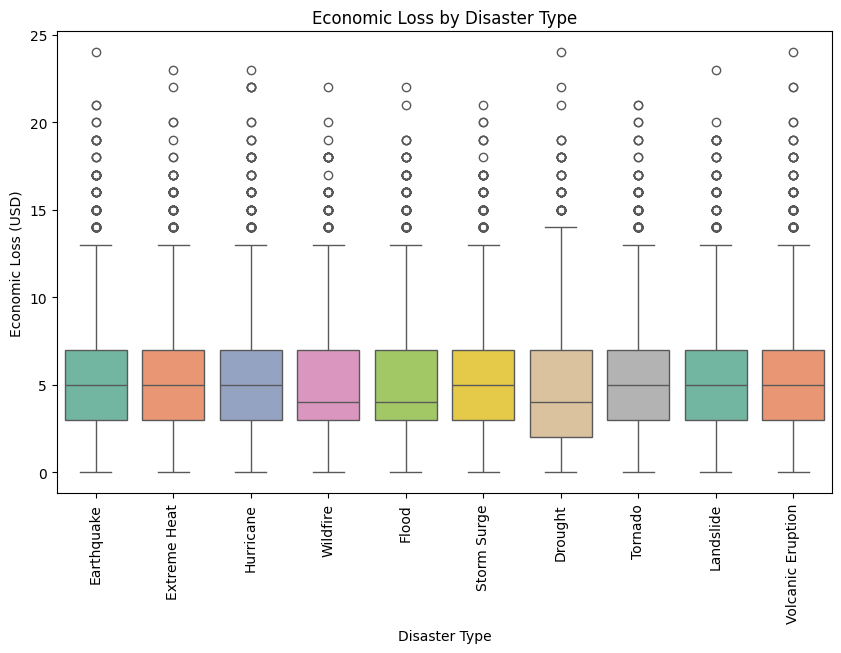

In [ ]:
# Identifikasi outlier

plt.figure(figsize=(10, 6))
sns.boxplot(x='disaster_type', y='economic_loss_million', data=df, palette='Set2')
plt.title('Economic Loss by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Economic Loss (USD)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top5_outliers = df.sort_values(by='economic_loss_million', ascending=False).head(5)
top5_outliers[['date', 'year', 'country', 'disaster_type', 'severity_index', 'economic_loss_million']]

,date,year,country,disaster_type,severity_index,economic_loss_million
38686,2020-02-20,2020,Nigeria,Earthquake,10.00,24.0
39816,2020-11-17,2020,Chile,Drought,9.13,24.0
8712,2021-02-23,2021,Canada,Volcanic Eruption,10.00,24.0
35142,2020-03-03,2020,Turkey,Landslide,10.00,23.0
16474,2020-01-14,2020,South Africa,Hurricane,10.00,23.0


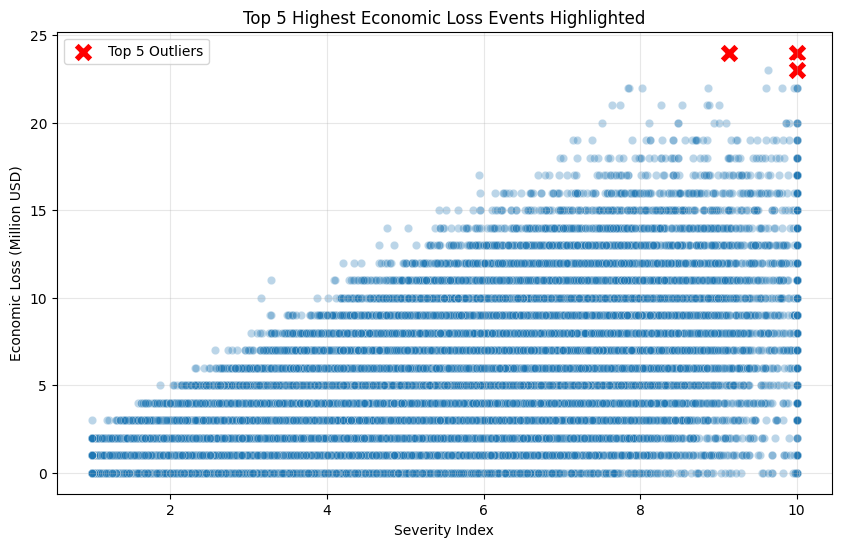

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='severity_index',
    y='economic_loss_million',
    alpha=0.3
)

# Tambahkan marker khusus untuk top 5 outlier
sns.scatterplot(
    data=top5_outliers,
    x='severity_index',
    y='economic_loss_million',
    s=200,
    color='red',
    marker='X',
    label="Top 5 Outliers"
)

plt.title("Top 5 Highest Economic Loss Events Highlighted")
plt.xlabel("Severity Index")
plt.ylabel("Economic Loss (Million USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

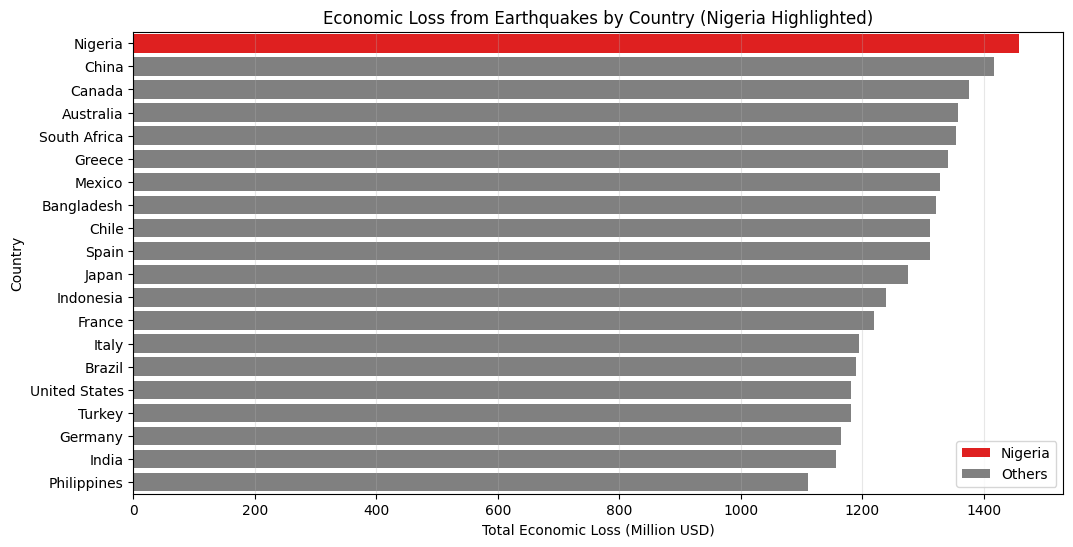

In [ ]:
eq_df = df[df['disaster_type'] == 'Earthquake']

eq_loss_rank = (
    eq_df.groupby('country')['economic_loss_million']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Highlight Nigeria
eq_loss_rank['highlight'] = eq_loss_rank['country'].apply(lambda x: 'Nigeria' if x == 'Nigeria' else 'Others')

plt.figure(figsize=(12,6))
sns.barplot(
    data=eq_loss_rank,
    x='economic_loss_million',
    y='country',
    hue='highlight',
    palette={'Nigeria':'red','Others':'gray'}
)

plt.title("Economic Loss from Earthquakes by Country (Nigeria Highlighted)")
plt.xlabel("Total Economic Loss (Million USD)")
plt.ylabel("Country")
plt.legend(title="")
plt.grid(axis='x', alpha=0.3)
plt.show()


In [ ]:
# RQ Utama : Bagaimana tingkat keparahan bencana memengaruhi dampak ekonomi, tingkat korban, dan efektivitas respons penanggulangan di berbagai negara?

# 1. Negara dan jenis bencana mana yang menunjukkan dampak terbesar?
# 2. Apakah bencana dengan tingkat keparahan lebih tinggi selalu menyebabkan kerugian ekonomi lebih besar?
# 3. Bagaimana hubungan antara waktu respons (response_time_hours) dan efektivitas respons (response_efficiency_score)?

In [ ]:
# 1. Negara dan jenis bencana mana yang menunjukkan dampak terbesar?

# Group data by country & disaster type
impact_df = (
    df.groupby(['country', 'disaster_type', 'severity_index'])['economic_loss_million']
    .sum()
    .reset_index()
    .sort_values(by='economic_loss_million', ascending=False)
)

impact_df.head(10)

,country,disaster_type,severity_index,economic_loss_million
33954,South Africa,Hurricane,10.0,59.0
17169,Greece,Extreme Heat,10.0,59.0
3122,Bangladesh,Hurricane,10.0,57.0
11017,China,Extreme Heat,10.0,54.0
4593,Brazil,Earthquake,10.0,52.0
10189,Chile,Volcanic Eruption,10.0,52.0
9574,Chile,Landslide,10.0,50.0
35370,Spain,Earthquake,10.0,48.0
38257,Turkey,Landslide,10.0,48.0
36370,Spain,Storm Surge,10.0,46.0


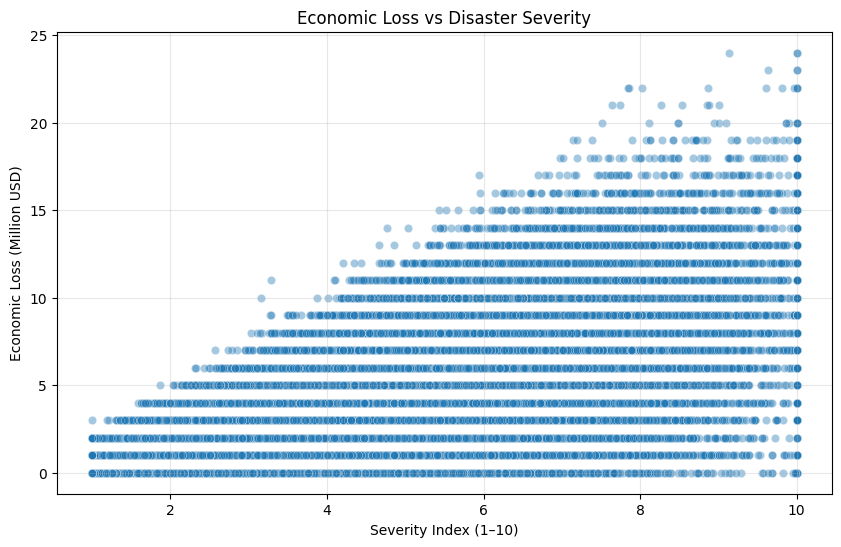

In [ ]:
# 2. Apakah bencana dengan tingkat keparahan lebih tinggi selalu menyebabkan kerugian ekonomi lebih besar?

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='severity_index',
    y='economic_loss_million',
    alpha=0.4
)

plt.title("Economic Loss vs Disaster Severity")
plt.xlabel("Severity Index (1–10)")
plt.ylabel("Economic Loss (Million USD)")
plt.grid(alpha=0.3)
plt.show()

Findings :<br>
a. Titik - titik scatter menunjukkan adanya korelasi positif antara tingkat kerusakan bencana dengan kerugian ekonomi<br>
b. Tidak semua bencana yang parah menimbulkan kerugian ekonomi yang besar

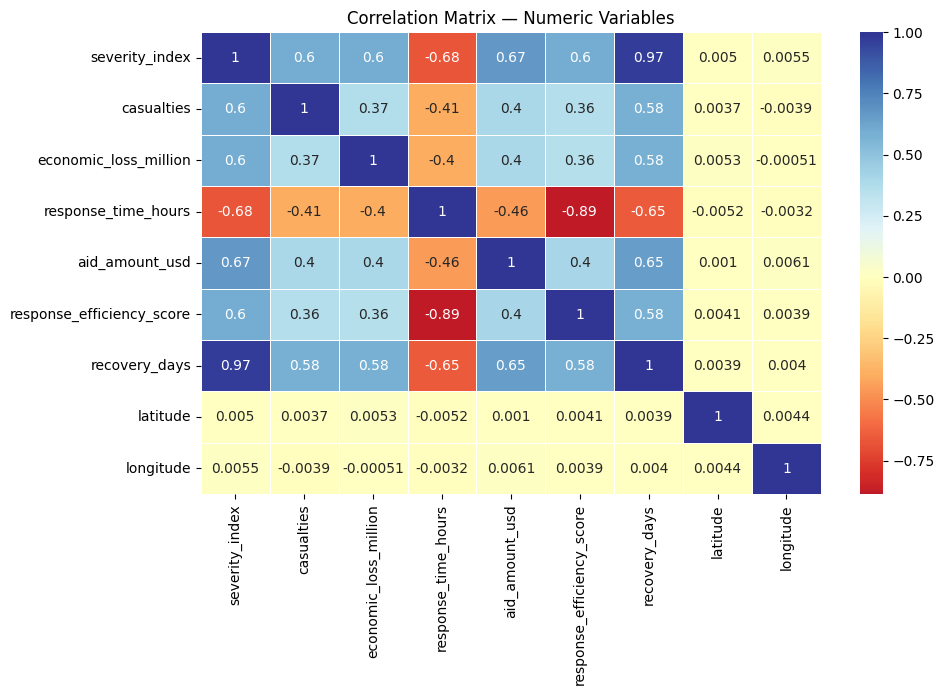

In [ ]:
matrix = [
    'severity_index',
    'casualties',
    'economic_loss_million',
    'response_time_hours',
    'aid_amount_usd',
    'response_efficiency_score',
    'recovery_days',
    'latitude',
    'longitude'
]

plt.figure(figsize=(10,6))
sns.heatmap(
    df[matrix].corr(),
    annot=True,
    cmap='RdYlBu',
    center=0,
    linewidths=0.5
)

plt.title('Correlation Matrix — Numeric Variables')
plt.show()

Faktor lain penyebab kerugian ekonomi : <br>
a. waktu pemulihan --> semakin lama suatu wilayah pulih semakin banyak cost yang dibutuhkan <br>
b. Lamanya waktu pemulihan memiliki korelasi yang kuat dengan waktu respon saat bencana dan nilai bantuan kemanusiaan yang diberikan<br>
c. Waktu respon dinilai sebagai faktor krusial di berbagai aspek dampak bencana

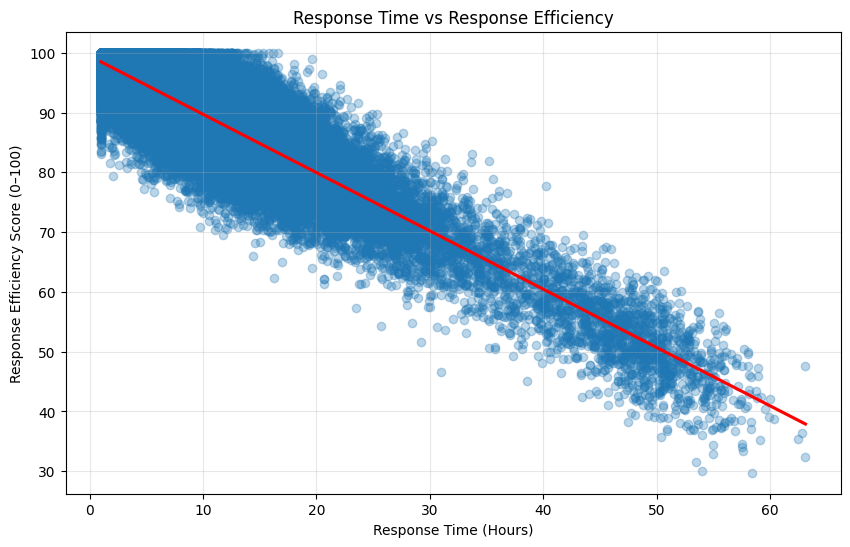

In [ ]:
# 3. Bagaimana hubungan antara waktu respons (response_time_hours) dan efektivitas respons (response_efficiency_score)?

plt.figure(figsize=(10,6))

sns.regplot(
    data=df,
    x='response_time_hours',
    y='response_efficiency_score',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)

plt.title("Response Time vs Response Efficiency")
plt.xlabel("Response Time (Hours)")
plt.ylabel("Response Efficiency Score (0–100)")
plt.grid(alpha=0.3)
plt.show()

Findings : <br>
a. Titik scatter menunjukkan adanya korelasi negatif antara waktu respon bencana dengan point efektifitas respon bencana.

In [ ]:
df.to_excel('exploration_results.xlsx', index=False)